## LIBRARY

In [ ]:
pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.8 MB/s 
     |████████████████████████████████| 1.6 MB 36.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from keras_tuner.tuners import RandomSearch

## PREPARING DATA

In [ ]:
def preparingData():
    df_raw = pd.read_excel("data.xlsx")
    df = df_raw[["delta pressure", "Leak rate (STB/d)", "leak_location"]]
    return df

In [ ]:
df = preparingData()

NameError: ignored

## PREPROCESSING DATA

In [ ]:
def preprocessingData(df):
    X = df.iloc[:, :2]
    y = df["leak_location"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocessingData(df)

## Baseline Artificial Neural Network

### Model

In [ ]:
def createFeatureScalingLayer(X_train):
    normalize = layers.Normalization()
    normalize.adapt(X_train)
    return normalize

In [ ]:
normalize = createFeatureScalingLayer(X_train)

In [ ]:
def baselineANN():
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape = (2,)))
    model.add(normalize)
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1, name='output_layer'))

    model.compile(loss = 'mean_absolute_error',
                  optimizer = keras.optimizers.Adam(),
                  metrics = ['mean_absolute_error'])

    return model

In [ ]:
baselineModel = baselineANN()

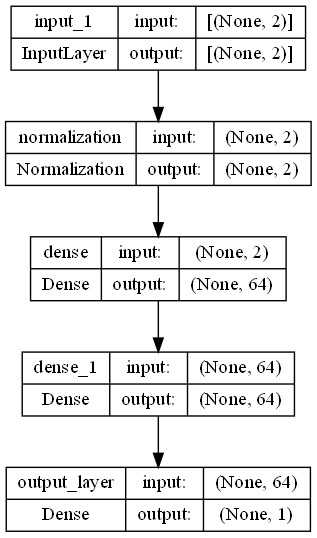

In [ ]:
plot_model(baselineModel, show_shapes=True, dpi=100, show_layer_names=True)

In [ ]:
def trainModel(model, X_train, y_train):
    history = model.fit(X_train, y_train, epochs=200, steps_per_epoch=25, validation_split=0.2, verbose=0)
    return history

In [ ]:
history = trainModel(baselineModel, X_train, y_train)

### Plot

#### History Training

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Leak location]')
    plt.legend()
    plt.grid(True)

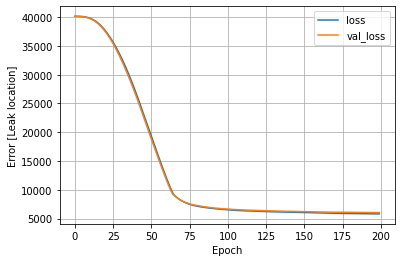

In [ ]:
plot_loss(history)

#### Prediction data train & data test

In [ ]:
def plot_predVStrue(model, X, y):
    predictions = model.predict(X).flatten()
    a = plt.axes(aspect='equal')
    plt.scatter(predictions, y)
    plt.xlabel('True Values [Leak location]')
    plt.ylabel('Predictions [Leak location]')
    lims = [0, 80000]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims, color='red')

13/13 [==============================] - 0s 1ms/step


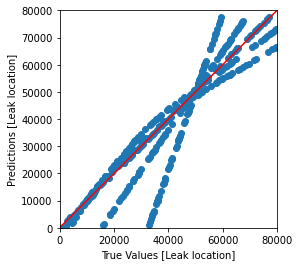

In [ ]:
plot_predVStrue(baselineModel, X_test, y_test)

In [ ]:
def plot_perLeakRate(model, X, y):
    idx = X.index[X['Leak rate (STB/d)'] == 280].tolist()
    d_280 = X.loc[idx]
    pred_280 = model.predict(d_280)
    sim_280 = y.loc[idx]

    idx = X.index[X['Leak rate (STB/d)'] == 560].tolist()
    d_560 = X.loc[idx]
    pred_560 = model.predict(d_560)
    sim_560 = y.loc[idx]

    idx = X.index[X['Leak rate (STB/d)'] == 840].tolist()
    d_840 = X.loc[idx]
    pred_840 = model.predict(d_840)
    sim_840 = y.loc[idx]

    idx = X.index[X['Leak rate (STB/d)'] == 1120].tolist()
    d_1120 = X.loc[idx]
    pred_1120 = model.predict(d_1120)
    sim_1120 = y.loc[idx]

    idx = X.index[X['Leak rate (STB/d)'] == 1400].tolist()
    d_1400 = X.loc[idx]
    pred_1400 = model.predict(d_1400)
    sim_1400 = y.loc[idx]

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs[0, 0].plot(sim_280, sim_280, color='red')
    axs[0, 0].scatter(pred_280, sim_280, color="blue")
    axs[0, 0].set_title('Rate 280 STB/D')
    axs[0, 1].plot(sim_560, sim_560, color="red")
    axs[0, 1].scatter(pred_560, sim_560, color="orange")
    axs[0, 1].set_title('Rate 560 STB/D')
    axs[0, 2].plot(sim_840, sim_840, color="red")
    axs[0, 2].scatter(pred_840, sim_840, color="green")
    axs[0, 2].set_title('Rate 840 STB/D')
    axs[1, 0].plot(sim_1120, sim_1120, color="red")
    axs[1, 0].scatter(pred_1120, sim_1120, color="purple")
    axs[1, 0].set_title('Rate 1120 STB/D')
    axs[1, 1].plot(sim_1400, sim_1400, color="red")
    axs[1, 1].scatter(pred_1400, sim_1400, color="brown")
    axs[1, 1].set_title('Rate 1400 STB/D')

    for ax in axs.flat:
        ax.set(xlabel='prediction', ylabel='simulation')

3/3 [==============================] - 0s 3ms/step


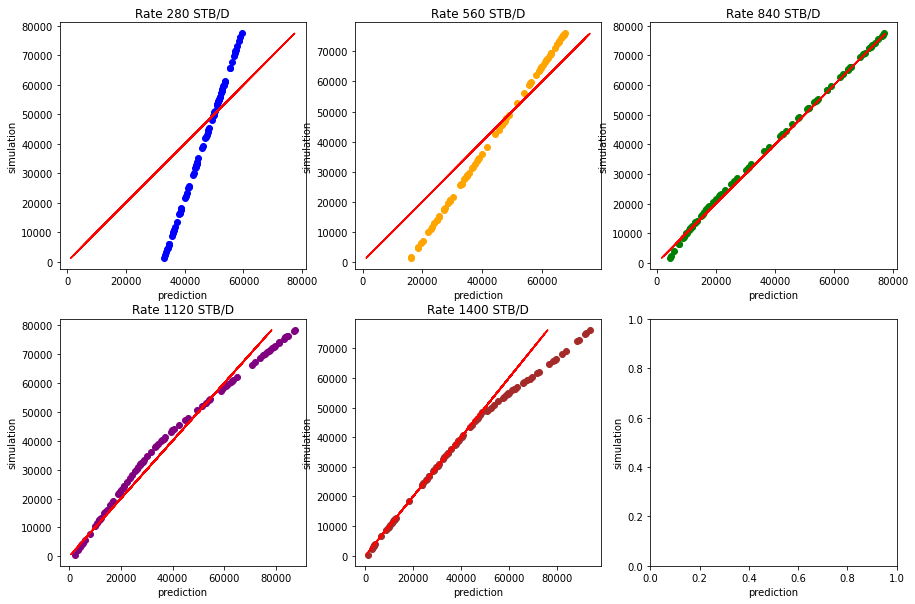

In [ ]:
plot_perLeakRate(baselineModel, X_test, y_test)

#### Evaluate

In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    print(f'Mean absolute error for train data {mean_absolute_error(y_train, model.predict(X_train)) :.5f}')
    print(f'Mean absolute error for test data {mean_absolute_error(y_test, model.predict(X_test)) :.5f}')

In [ ]:
evaluate(baselineModel, X_train, X_test, y_train, y_test)

50/50 [==============================] - 0s 848us/step
Mean absolute error for train data 5858.87556
13/13 [==============================] - 0s 833us/step
Mean absolute error for test data 5493.76256


## Tuning Hyperparameter with DIfferent Layers

### **2 Layers**

#### Tuning Layers

In [ ]:
def build_model_2(hp):
    optimized_model = keras.Sequential()
    optimized_model.add(layers.InputLayer(input_shape=(2,)))
    optimized_model.add(normalize)
    for i in range(0, 2):
        optimized_model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                         activation='relu'))
        
    optimized_model.add(layers.Dense(1, name='output_layer'))
    optimized_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3])),
                            loss='mean_absolute_error',
                            metrics=['mean_absolute_error'])
    
    return optimized_model

In [ ]:
def layer2(X_train, y_train):
    tuner2 = RandomSearch(build_model_2,
                          objective='val_mean_absolute_error',
                          max_trials=10,
                          executions_per_trial=1,
                          directory='TUning Project 2 Layers',
                          project_name='OPPINET Leak Detector',
                          overwrite=True)

    tuner2.search(X_train, 
                  y_train,
                  epochs=200,
                  steps_per_epoch=25,
                  # validation_data = (X_test_scaled, y_test),
                  validation_split=0.2,
                  verbose=1)

    return tuner2

In [ ]:
%%time
tuner2 = layer2(X_train, y_train)

Trial 10 Complete [00h 00m 21s]
val_mean_absolute_error: 1216.583740234375

Best val_mean_absolute_error So Far: 179.8409881591797
Total elapsed time: 00h 03m 46s
INFO:tensorflow:Oracle triggered exit
Wall time: 3min 46s


In [ ]:
def printBestHps(layers, tuner):
    best_hps = tuner.get_best_hyperparameters(1)[0]
    for i in range(layers):
        print(f'units_{i}:', best_hps.get(f"units_{i}"))
    print('learning_rate:', best_hps.get('learning_rate'))

In [ ]:
printBestHps(2, tuner2)

units_0: 64
units_1: 64
learning_rate: 0.01


#### Best Model

In [ ]:
def bestModel(tuner):
    model = tuner.get_best_models()[0]
    return model

In [ ]:
best_2layers = bestModel(tuner2)

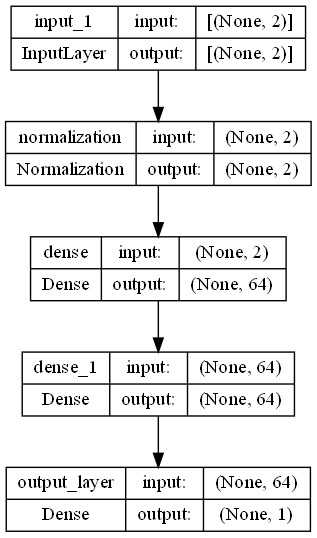

In [ ]:
plot_model(best_2layers, show_shapes=True, dpi=100, show_layer_names=True)

3/3 [==============================] - 0s 2ms/step


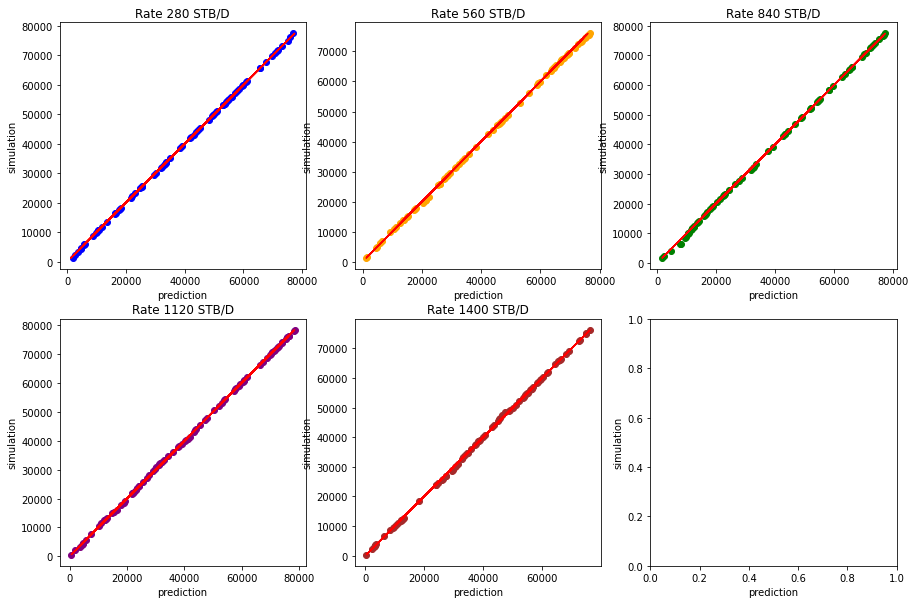

In [ ]:
plot_perLeakRate(best_2layers, X_test, y_test)

In [ ]:
evaluate(best_2layers, X_train, X_test, y_train, y_test)

50/50 [==============================] - 0s 1ms/step
Mean absolute error for train data 175.12585
13/13 [==============================] - 0s 1ms/step
Mean absolute error for test data 177.18575


In [ ]:
def saveModel(model, layer):
    model.save('model_' + str(layer) + 'layers.h5')

In [ ]:
saveModel(best_2layers, 2)

### **3 Layers**

#### Tuning Layers

In [ ]:
def build_model_3(hp):
    optimized_model = keras.Sequential()
    optimized_model.add(layers.InputLayer(input_shape=(2,)))
    optimized_model.add(normalize)
    for i in range(0, 3):
        optimized_model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                         activation='relu'))
        
    optimized_model.add(layers.Dense(1, name='output_layer'))
    optimized_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3])),
                            loss='mean_absolute_error',
                            metrics=['mean_absolute_error'])
    
    return optimized_model

In [ ]:
def layer3(X_train, y_train):
    tuner3 = RandomSearch(build_model_3,
                          objective='val_mean_absolute_error',
                          max_trials=10,
                          executions_per_trial=1,
                          directory='TUning Project 3 Layers',
                          project_name='OPPINET Leak Detector',
                          overwrite=True)

    tuner3.search(X_train, 
                  y_train,
                  epochs=200,
                  steps_per_epoch=25,
                  # validation_data = (X_test_scaled, y_test),
                  validation_split=0.2,
                  verbose=1)

    return tuner3

In [ ]:
%%time
tuner3 = layer3(X_train, y_train)

Trial 10 Complete [00h 00m 24s]
val_mean_absolute_error: 146.90814208984375

Best val_mean_absolute_error So Far: 81.18956756591797
Total elapsed time: 00h 03m 53s
INFO:tensorflow:Oracle triggered exit
Wall time: 3min 52s


In [ ]:
printBestHps(3, tuner3)

units_0: 288
units_1: 192
units_2: 352
learning_rate: 0.001


#### Best Model

In [ ]:
best_3layers = bestModel(tuner3)

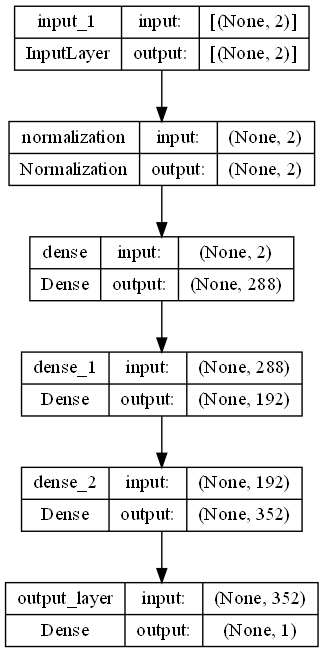

In [ ]:
plot_model(best_3layers, show_shapes=True, dpi=100, show_layer_names=True)

3/3 [==============================] - 0s 2ms/step


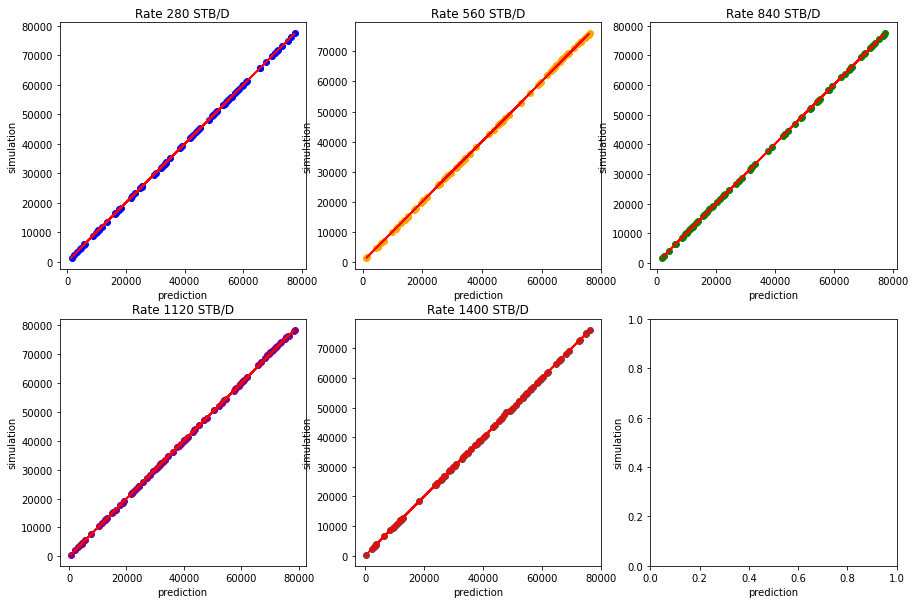

In [ ]:
plot_perLeakRate(best_3layers, X_test, y_test)

In [ ]:
evaluate(best_3layers, X_train, X_test, y_train, y_test)

50/50 [==============================] - 0s 902us/step
Mean absolute error for train data 77.12269
13/13 [==============================] - 0s 1ms/step
Mean absolute error for test data 80.59215


In [ ]:
saveModel(best_3layers, 3)

### **4 Layers**

#### Tuning Layers

In [ ]:
def build_model_4(hp):
    optimized_model = keras.Sequential()
    optimized_model.add(layers.InputLayer(input_shape=(2,)))
    optimized_model.add(normalize)
    for i in range(0, 4):
        optimized_model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                         activation='relu'))
        
    optimized_model.add(layers.Dense(1, name='output_layer'))
    optimized_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3])),
                            loss='mean_absolute_error',
                            metrics=['mean_absolute_error'])

    return optimized_model

In [ ]:
def layer4(X_train, y_train):
    tuner4 = RandomSearch(build_model_4,
                          objective='val_mean_absolute_error',
                          max_trials=10,
                          executions_per_trial=1,
                          directory='TUning Project 4 Layers',
                          project_name='OPPINET Leak Detector',
                          overwrite=True)
    tuner4.search(X_train, 
                  y_train,
                  epochs=200,
                  steps_per_epoch=25,
                  # validation_data = (X_test_scaled, y_test),
                  validation_split=0.2,
                  verbose=1)

    return tuner4

In [ ]:
%%time
tuner4 = layer4(X_train, y_train)

Trial 10 Complete [00h 00m 26s]
val_mean_absolute_error: 61.0728759765625

Best val_mean_absolute_error So Far: 53.57866668701172
Total elapsed time: 00h 03m 58s
INFO:tensorflow:Oracle triggered exit
Wall time: 3min 57s


In [ ]:
printBestHps(4, tuner4)

units_0: 192
units_1: 224
units_2: 512
units_3: 352
learning_rate: 0.001


#### Best Model

In [ ]:
best_4layers = bestModel(tuner4)

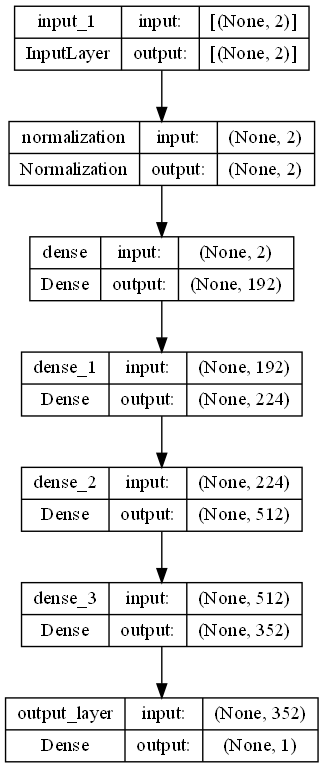

In [ ]:
plot_model(best_4layers, show_shapes=True, dpi=100, show_layer_names=True)

3/3 [==============================] - 0s 3ms/step


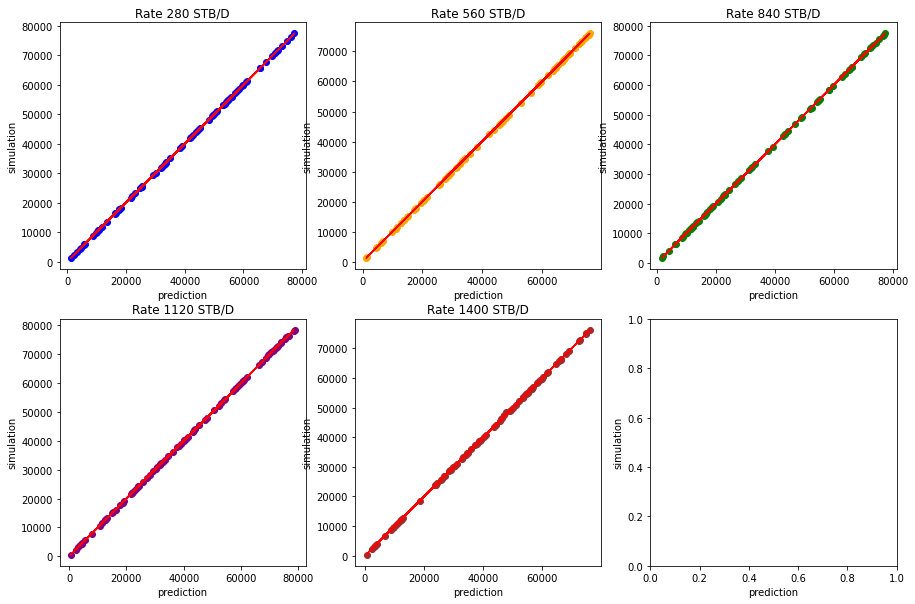

In [ ]:
plot_perLeakRate(best_4layers, X_test, y_test)

In [ ]:
evaluate(best_4layers, X_train, X_test, y_train, y_test)

50/50 [==============================] - 0s 2ms/step
Mean absolute error for train data 53.76603
13/13 [==============================] - 0s 2ms/step
Mean absolute error for test data 49.69277


In [ ]:
saveModel(best_4layers, 4)

### **5 Layers**

#### Tuning Layers

In [ ]:
def build_model_5(hp):
    optimized_model = keras.Sequential()
    optimized_model.add(layers.InputLayer(input_shape=(2,)))
    optimized_model.add(normalize)
    for i in range(0, 5):
        optimized_model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                         activation='relu'))
        
    optimized_model.add(layers.Dense(1, name='output_layer'))
    optimized_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3])),
                            loss='mean_absolute_error',
                            metrics=['mean_absolute_error'])
    
    return optimized_model

In [ ]:
def layer5(X_train, y_train):
    tuner5 = RandomSearch(build_model_5,
                          objective='val_mean_absolute_error',
                          max_trials=10,
                          executions_per_trial=1,
                          directory='TUning Project 5 Layers',
                          project_name='OPPINET Leak Detector',
                          overwrite=True)
    
    tuner5.search(X_train, 
                  y_train,
                  epochs=200,
                  steps_per_epoch=25,
                  # validation_data = (X_test_scaled, y_test),
                  validation_split=0.2,
                  verbose=1)

    return tuner5

In [ ]:
%%time
tuner5 = layer5(X_train, y_train)

Trial 10 Complete [00h 00m 25s]
val_mean_absolute_error: 321.7257995605469

Best val_mean_absolute_error So Far: 61.904197692871094
Total elapsed time: 00h 04m 46s
INFO:tensorflow:Oracle triggered exit
Wall time: 4min 46s


In [ ]:
printBestHps(5, tuner5)

units_0: 384
units_1: 352
units_2: 288
units_3: 160
units_4: 288
learning_rate: 0.001


#### Best Model

In [ ]:
best_5layers = bestModel(tuner5)

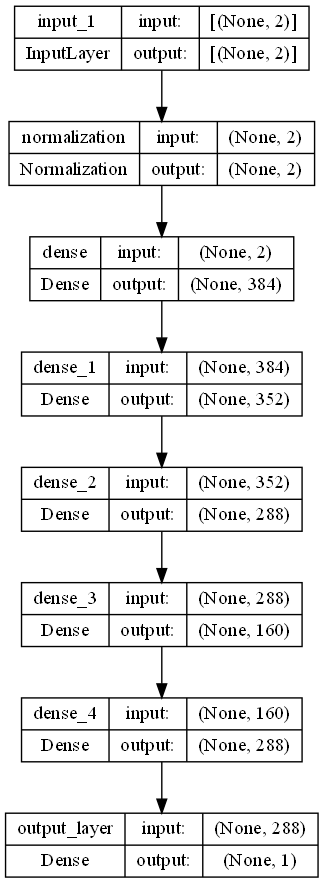

In [ ]:
plot_model(best_5layers, show_shapes=True, dpi=100, show_layer_names=True)

3/3 [==============================] - 0s 3ms/step


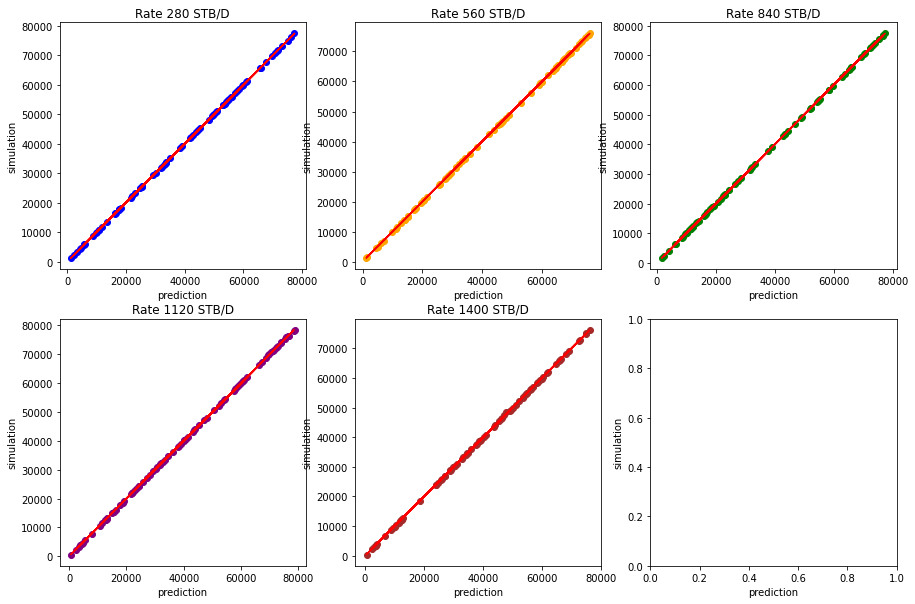

In [ ]:
plot_perLeakRate(best_5layers, X_test, y_test)

In [ ]:
evaluate(best_5layers, X_train, X_test, y_train, y_test)

50/50 [==============================] - 0s 1ms/step
Mean absolute error for train data 64.59981
13/13 [==============================] - 0s 2ms/step
Mean absolute error for test data 63.05627


In [ ]:
saveModel(best_5layers, 5)

### **6 Layers**

#### Tuning Layers

In [ ]:
def build_model_6(hp):
    optimized_model = keras.Sequential()
    optimized_model.add(layers.InputLayer(input_shape=(2,)))
    optimized_model.add(normalize)
    for i in range(0, 6):
        optimized_model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                         activation='relu'))
        
    optimized_model.add(layers.Dense(1, name='output_layer'))
    optimized_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3])),
                            loss='mean_absolute_error',
                            metrics=['mean_absolute_error'])
    
    return optimized_model

In [ ]:
def layer6(X_train, y_train):
    tuner6 = RandomSearch(build_model_6,
                          objective='val_mean_absolute_error',
                          max_trials=10,
                          executions_per_trial=1,
                          directory='TUning Project 6 Layers',
                          project_name='OPPINET Leak Detector',
                          overwrite=True)
    
    tuner6.search(X_train, 
                  y_train,
                  epochs=200,
                  steps_per_epoch=25,
                  # validation_data = (X_test_scaled, y_test),
                  validation_split=0.2,
                  verbose=1)

    return tuner6

In [ ]:
%%time
tuner6 = layer6(X_train, y_train)

Trial 10 Complete [00h 00m 42s]
val_mean_absolute_error: 155.7941131591797

Best val_mean_absolute_error So Far: 88.3236083984375
Total elapsed time: 00h 04m 57s
INFO:tensorflow:Oracle triggered exit
Wall time: 4min 56s


In [ ]:
printBestHps(6, tuner6)

units_0: 128
units_1: 192
units_2: 416
units_3: 32
units_4: 160
units_5: 128
learning_rate: 0.001


#### Best Model

In [ ]:
best_6layers = bestModel(tuner6)

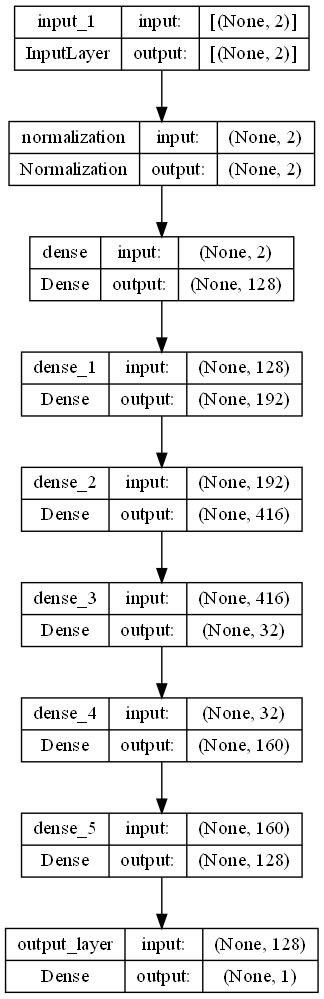

In [ ]:
plot_model(best_6layers, show_shapes=True, dpi=100, show_layer_names=True)

3/3 [==============================] - 0s 2ms/step


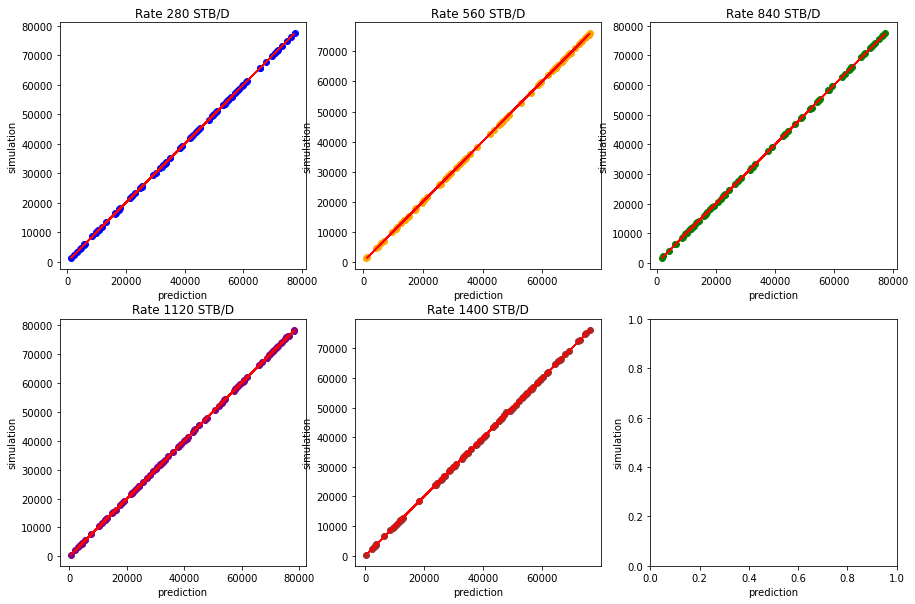

In [ ]:
plot_perLeakRate(best_6layers, X_test, y_test)

In [ ]:
evaluate(best_6layers, X_train, X_test, y_train, y_test)

50/50 [==============================] - 0s 1ms/step
Mean absolute error for train data 86.39705
13/13 [==============================] - 0s 1ms/step
Mean absolute error for test data 84.29326


In [ ]:
saveModel(best_6layers, 6)

### **7 Layers**

#### Tuning Layers

In [ ]:
def build_model_7(hp):
    optimized_model = keras.Sequential()
    optimized_model.add(layers.InputLayer(input_shape=(2,)))
    optimized_model.add(normalize)
    for i in range(0, 7):
        optimized_model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                         activation='relu'))
        
    optimized_model.add(layers.Dense(1, name='output_layer'))
    optimized_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3])),
                            loss='mean_absolute_error',
                            metrics=['mean_absolute_error'])
    
    return optimized_model

In [ ]:
def layer7(X_train, y_train):
    tuner7 = RandomSearch(build_model_7,
                          objective='val_mean_absolute_error',
                          max_trials=10,
                          executions_per_trial=1,
                          directory='TUning Project 7 Layers',
                          project_name='OPPINET Leak Detector',
                          overwrite=True)
    
    tuner7.search(X_train, 
                  y_train,
                  epochs=200,
                  steps_per_epoch=25,
                  # validation_data = (X_test_scaled, y_test),
                  validation_split=0.2,
                  verbose=1)

    return tuner7

In [ ]:
%%time
tuner7 = layer7(X_train, y_train)

Trial 10 Complete [00h 00m 27s]
val_mean_absolute_error: 364.9317626953125

Best val_mean_absolute_error So Far: 91.01429748535156
Total elapsed time: 00h 05m 11s
INFO:tensorflow:Oracle triggered exit
Wall time: 5min 10s


In [ ]:
printBestHps(7, tuner7)

units_0: 192
units_1: 288
units_2: 192
units_3: 32
units_4: 160
units_5: 320
units_6: 224
learning_rate: 0.001


#### Best Model

In [ ]:
best_7layers = bestModel(tuner7)

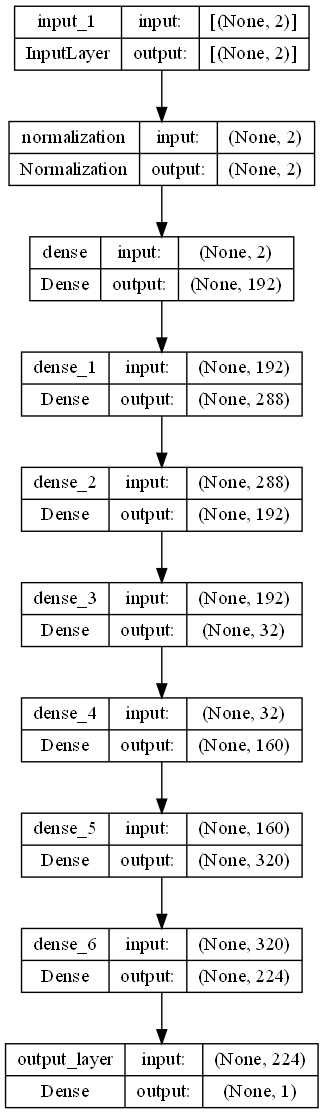

In [ ]:
plot_model(best_7layers, show_shapes=True, dpi=100, show_layer_names=True)

3/3 [==============================] - 0s 2ms/step


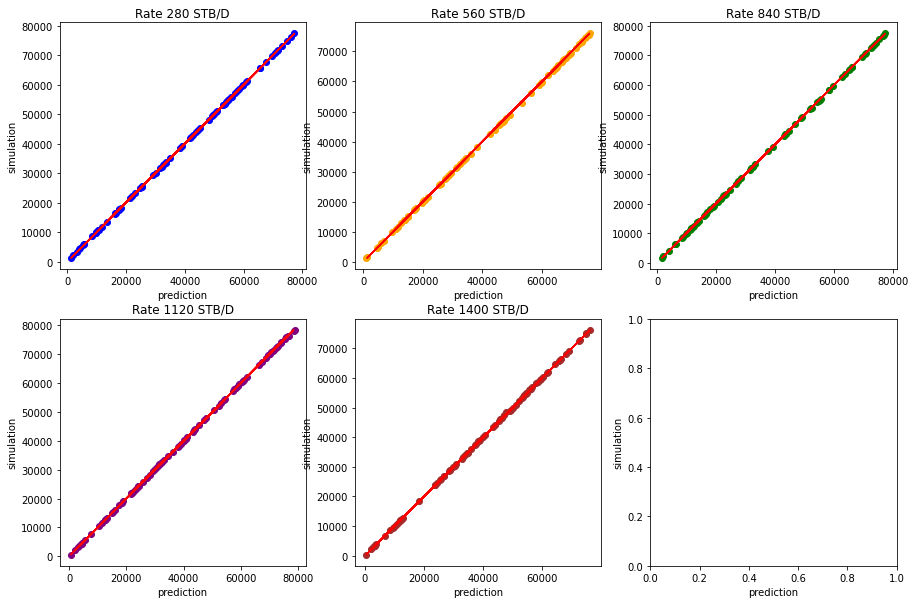

In [ ]:
plot_perLeakRate(best_7layers, X_test, y_test)

In [ ]:
evaluate(best_7layers, X_train, X_test, y_train, y_test)

50/50 [==============================] - 0s 1ms/step
Mean absolute error for train data 92.54898
13/13 [==============================] - 0s 2ms/step
Mean absolute error for test data 92.98878


In [ ]:
saveModel(best_7layers, 7)

### Evaluating Each Models

In [ ]:
def maeEachModels(X_train, X_test, y_train, y_test):
    models = []
    for i in range(2, 8):
        models.append(keras.models.load_model('model_' + str(i) + 'layers.h5'))

    train_mae = []
    test_mae = []
    for model in models:
        train_mae.append(mean_absolute_error(y_train, model.predict(X_train)))
        test_mae.append(mean_absolute_error(y_test, model.predict(X_test)))

    return models, train_mae, test_mae

In [ ]:
models, train_mae, test_mae = maeEachModels(X_train, X_test, y_train, y_test);

13/13 [==============================] - 0s 2ms/step


In [ ]:
def plotMaeEachModels(train_mae, test_mae):
    labels = ["2 layers", "3 layers", "4 layers", "5 layers", "6 layers", "7 layers"]
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(9, 5))
    rects1 = ax.bar(x - width/2, train_mae, width, label='Train')
    rects2 = ax.bar(x + width/2, test_mae, width, label='Test')

    ax.set_ylabel('MAE')
    ax.set_title('MAE vs Layers')
    ax.set_xticklabels(["0"] + labels)
    ax.legend()

    plt.show()

<ipython-input-83-ae3d7675cbb8>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0"] + labels)


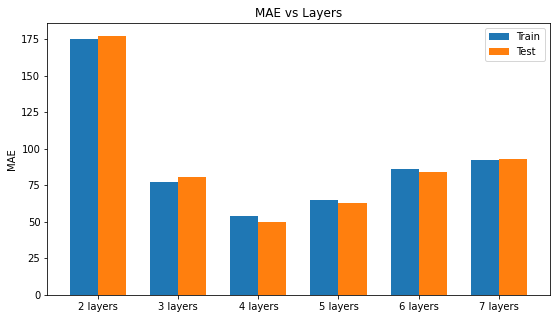

In [ ]:
plotMaeEachModels(train_mae, test_mae)

### Final Model

In [ ]:
test_mae

[177.18575323195685,
 80.59214725350975,
 49.69276585017231,
 63.05626753039826,
 84.29326405919583,
 92.98877549709233]

In [ ]:
def finalANN(test_mae, models):
    idx = test_mae.index(min(test_mae))
    return models[idx]

In [ ]:
finalModel = finalANN(test_mae, models)

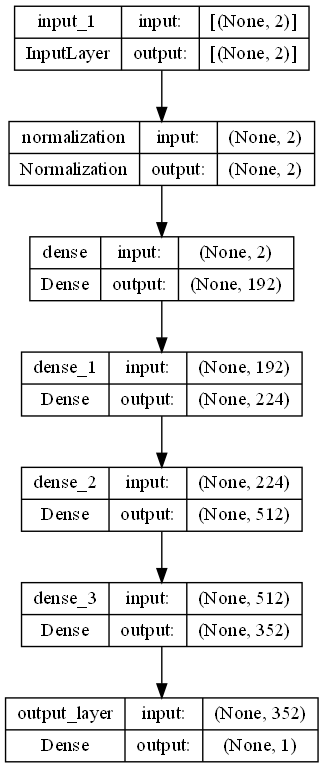

In [ ]:
plot_model(finalModel, show_shapes=True, dpi=100, show_layer_names=True)

In [ ]:
evaluate(finalModel, X_train, X_test, y_train, y_test)

50/50 [==============================] - 0s 1ms/step
Mean absolute error for train data 53.76603
13/13 [==============================] - 0s 2ms/step
Mean absolute error for test data 49.69277


## Eksternal Test Data

In [ ]:
dft = pd.read_excel('data_test_external.xlsx')

FileNotFoundError: ignored

In [ ]:
dft.head()

,delta_pressure,leak_rate,leak_position
0,188.8896,100,2245
1,189.0727,100,13432
2,189.3382,100,29643
3,189.4389,100,35734
4,189.5178,100,40545


In [ ]:
X_dft = dft.iloc[:,:2]
X_dft.head()

,delta_pressure,leak_rate
0,188.8896,100
1,189.0727,100
2,189.3382,100
3,189.4389,100
4,189.5178,100


In [ ]:
pred_dft = finalModel.predict(X_dft)

2/2 [==============================] - 0s 3ms/step


In [ ]:
res_dft = dft.copy()
res_dft["leak_pred"] = pred_dft

In [ ]:
d_100 = res_dft.loc[res_dft["leak_rate"] == 100].iloc[:,:2]
pred_100 = finalModel.predict(d_100)
sim_100 = res_dft.loc[res_dft["leak_rate"] == 100].iloc[:,2]

d_500 = res_dft.loc[res_dft["leak_rate"] == 500].iloc[:,:2]
pred_500 = finalModel.predict(d_500)
sim_500 = res_dft.loc[res_dft["leak_rate"] == 500].iloc[:,2]

d_1000 = res_dft.loc[res_dft["leak_rate"] == 1000].iloc[:,:2]
pred_1000 = finalModel.predict(d_1000)
sim_1000 = res_dft.loc[res_dft["leak_rate"] == 1000].iloc[:,2]

d_1247 = res_dft.loc[res_dft["leak_rate"] == 1247].iloc[:,:2]
pred_1247 = finalModel.predict(d_1247)
sim_1247 = res_dft.loc[res_dft["leak_rate"] == 1247].iloc[:,2]

d_1638 = res_dft.loc[res_dft["leak_rate"] == 1638].iloc[:,:2]
pred_1638 = finalModel.predict(d_1638)
sim_1638 = res_dft.loc[res_dft["leak_rate"] == 1638].iloc[:,2]

d_2000 = res_dft.loc[res_dft["leak_rate"] == 2000].iloc[:,:2]
pred_2000 = finalModel.predict(d_2000)
sim_2000 = res_dft.loc[res_dft["leak_rate"] == 2000].iloc[:,2]

1/1 [==============================] - 0s 24ms/step


In [ ]:
print(f'Mean absolute error for 100 STB/D {mean_absolute_error(sim_100, pred_100) :.5f}')
print(f'Mean absolute error for 500 STB/D {mean_absolute_error(sim_500, pred_500) :.5f}')
print(f'Mean absolute error for 1000 STB/D {mean_absolute_error(sim_1000, pred_1000) :.5f}')
print(f'Mean absolute error for 1247 STB/D {mean_absolute_error(sim_1247, pred_1247) :.5f}')
print(f'Mean absolute error for 1638 STB/D {mean_absolute_error(sim_1638, pred_1638) :.5f}')
print(f'Mean absolute error for 2000 STB/D {mean_absolute_error(sim_2000, pred_2000) :.5f}')

Mean absolute error for 100 STB/D 13752.21802
Mean absolute error for 500 STB/D 1003.34759
Mean absolute error for 1000 STB/D 251.08542
Mean absolute error for 1247 STB/D 497.84616
Mean absolute error for 1638 STB/D 3570.69791
Mean absolute error for 2000 STB/D 12990.81165


Text(0, 0.5, 'mean absolute error')

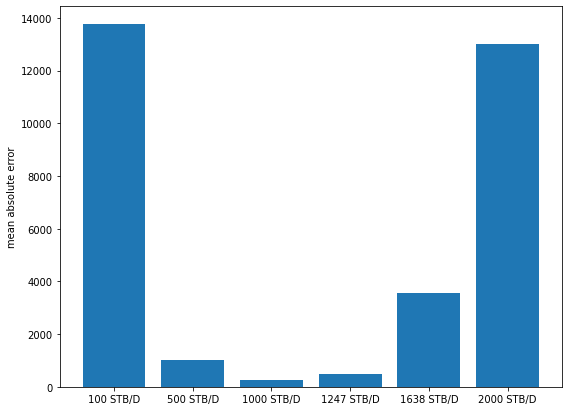

In [ ]:
rate = ["100 STB/D", "500 STB/D", "1000 STB/D", "1247 STB/D", "1638 STB/D", "2000 STB/D"]
mae = [
    mean_absolute_error(sim_100, pred_100),
    mean_absolute_error(sim_500, pred_500),
    mean_absolute_error(sim_1000, pred_1000),
    mean_absolute_error(sim_1247, pred_1247),
    mean_absolute_error(sim_1638, pred_1638),
    mean_absolute_error(sim_2000, pred_2000)
]

plt.figure(figsize = (9,7))
plt.bar(rate,mae)
plt.ylabel("mean absolute error")

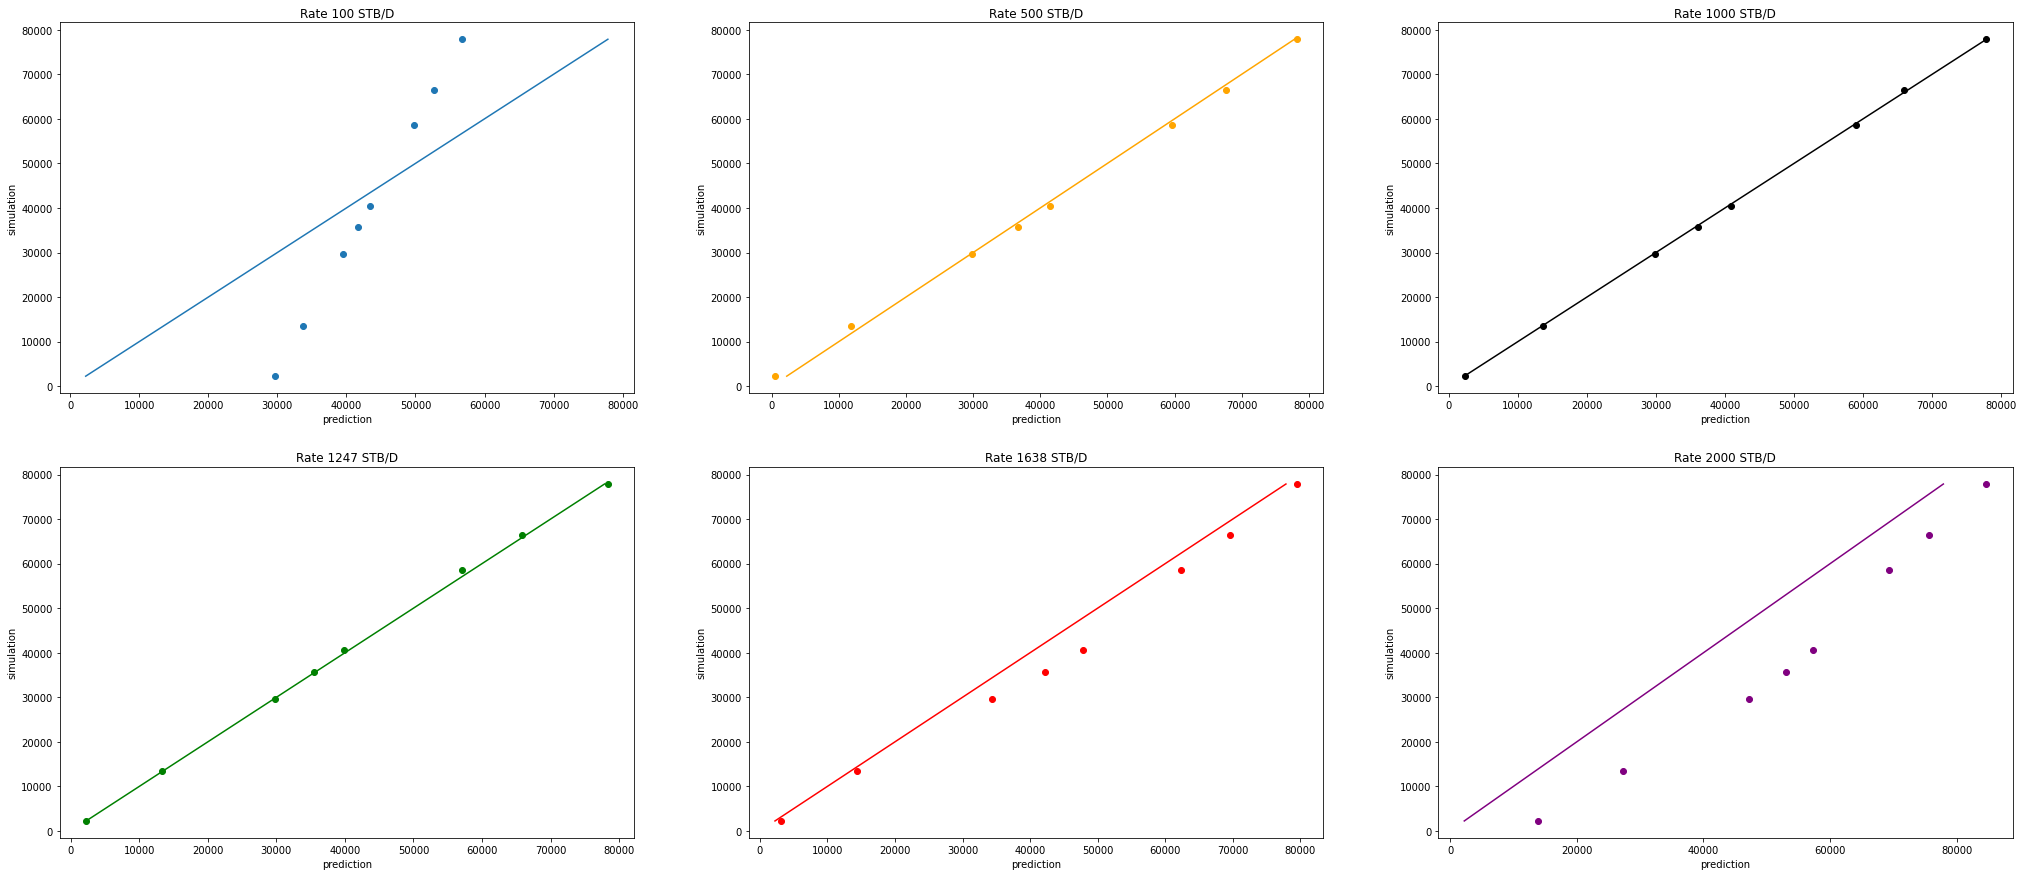

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(35, 15))
axs[0, 0].plot(sim_100, sim_100)
axs[0, 0].scatter(pred_100, sim_100)
axs[0, 0].set_title('Rate 100 STB/D')
axs[0, 1].plot(sim_500, sim_500, color = "orange")
axs[0, 1].scatter(pred_500, sim_500, color = "orange")
axs[0, 1].set_title('Rate 500 STB/D')
axs[0, 2].plot(sim_1000, sim_1000, color = "black")
axs[0, 2].scatter(pred_1000, sim_1000, color = "black")
axs[0, 2].set_title('Rate 1000 STB/D')

axs[1, 0].plot(sim_1247, sim_1247, color = "green")
axs[1, 0].scatter(pred_1247, sim_1247, color = "green")
axs[1, 0].set_title('Rate 1247 STB/D')
axs[1, 1].plot(sim_1638, sim_1638, color = "red")
axs[1, 1].scatter(pred_1638, sim_1638, color = "red")
axs[1, 1].set_title('Rate 1638 STB/D')
axs[1, 2].plot(sim_2000, sim_2000, color = "purple")
axs[1, 2].scatter(pred_2000, sim_2000, color = "purple")
axs[1, 2].set_title('Rate 2000 STB/D')

for ax in axs.flat:
    ax.set(xlabel='prediction', ylabel='simulation')

In [ ]:
res_dft

,delta_pressure,leak_rate,leak_position,leak_pred
0,188.8896,100,2245,29669.208984
1,189.0727,100,13432,33666.246094
2,189.3382,100,29643,39462.414062
3,189.4389,100,35734,41660.964844
4,189.5178,100,40545,43383.496094
5,189.8143,100,58652,49856.214844
6,189.9437,100,66532,52681.019531
7,190.1296,100,77867,56739.351562
8,183.8315,500,2245,495.426208
9,184.7419,500,13432,11770.447266
